<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Salazar Salazar Mildreth Nicole** 

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [6]:
# revisar archivo miningscience.py
import miningscience as msc
help(msc.download_pubmed)
help(msc.mining_pubs)

Help on function download_pubmed in module miningscience:

download_pubmed(keyword)
    La función download_pubmed son palabras claves para realizar una busqueda en Pubmed. 
    keyword: son palabras claves de búsqueda

Help on function mining_pubs in module miningscience:

mining_pubs(tipo, archivo)
    La función mining_pubs recibe dos argumentos, que corresponde al tipo de minado de datos que se desea y el documento del 
    cual se va a extraer los datos.
           "DP" --> recupera el año de publicación del artículo. El retorno es un dataframe con el PMID y el DP_year.
           "AU" --> recupera el número de autores por PMID. El retorno es un dataframe con el PMID y el num_auth.
           "AD" -->recupera el conteo de autores por país. El retorno es un dataframe con el country y el num_auth.




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [7]:
import re
import miningscience as msc
a = msc.download_pubmed("Ecuador genomics")
b=re.findall(r'[DIMP]{4}\-.*\d\n',a)
print ("El número de artículos es: ", len(b))
print ("El PMID del primero artículo es: ",b[0])

El número de artículos es:  193
El PMID del primero artículo es:  PMID- 35121084



## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [8]:
import miningscience as msc
pub_year = msc.mining_pubs("DP","Ecuador genomics")
pub_authors = msc.mining_pubs("AU","Ecuador genomics")
countries = msc.mining_pubs("AD","Ecuador genomics")

# Imprimimos los primeros 2 y ultimos 2 registros
print()
print("Los primeros dos y los dos ultimos registros")
print()

print ('DataFrames de pub_year')
# pub_year:
print(pub_year[1:3])
print()
print(pub_year[67:69])
print()

print ('DatFrames de pub_authors')
# pub_authors
print(pub_authors[0:2])
print()
print(pub_authors[191:193])
print()

print ('DataFrames de countries')
# countries
print(countries[0:2])
print()
print(countries[67:69])
print()


Los primeros dos y los dos ultimos registros

DataFrames de pub_year
       PMID Año de publicación
1  35121084               2022
2  35120121               2021

        PMID Año de publicación
67  32447234               2020
68  32419208               2020

DatFrames de pub_authors
       PMID  Numero de autores
0  35121084                 12
1  35120121                 14

         PMID  Numero de autores
191  17187350                  1
192   8661097                  9

DataFrames de countries
        pais  numero de autores
0  Argentina                 44
1     Canada                 83

           pais  numero de autores
67  Netherlands                  3
68      MexicoF                  4



## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


Diagrma de barras
La media es:  2018.1813471502592
La desviación estandar es:  3.1677516094333185


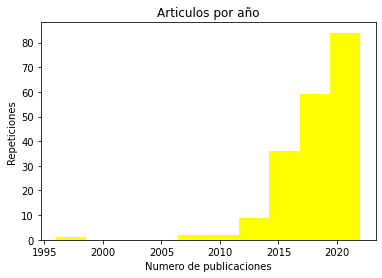

Gráfica de Boxplot


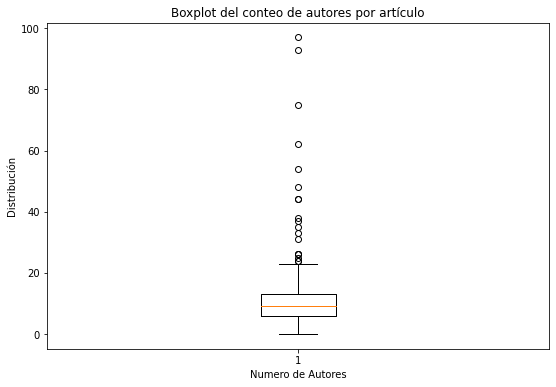

Gráfica de Nubes


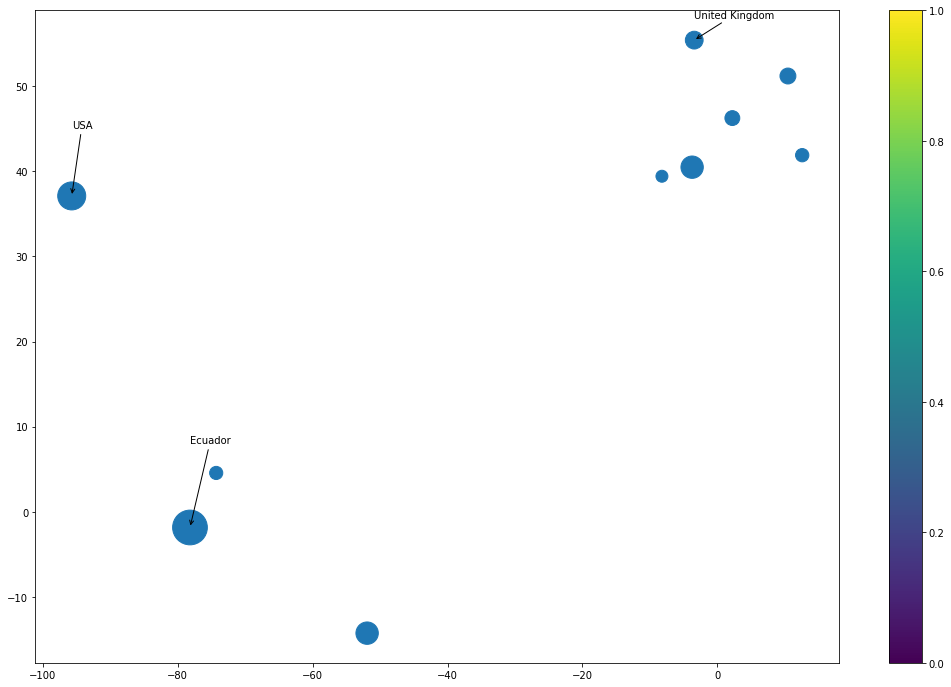

In [9]:

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import csv as csv

# Gráfica de pub_year
print ('Diagrma de barras')
pub_year["Año de publicación"] = pub_year["Año de publicación"].astype("int")
mean_py = pub_year["Año de publicación"].mean()
sd_py = pub_year["Año de publicación"].std()
print ("La media es: ", mean_py)
print ("La desviación estandar es: ", sd_py)
#print (pub_year["Año de publicación"])
intervalos = range(min(pub_year["Año de publicación"]), max(pub_year["Año de publicación"]))
plot.hist(x=pub_year["Año de publicación"], color = "yellow")
plot.title("Articulos por año")
plot.xlabel("Numero de publicaciones")
plot.ylabel("Repeticiones")
plot.show()

# Gráfica de Boxplot (pub_authors)
print ('Gráfica de Boxplot')
i = pub_authors.iloc[:,1]
s = pd.Series(i)
s1 = s.tolist()
s1.pop(79) #Eliminamos el dato atípico
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(s1)
plt.xlabel('Numero de Autores')
plt.ylabel('Distribución')
plt.title('Boxplot del conteo de autores por artículo')
plt.show()

#Gráfica de Nubes (countries)
print ('Gráfica de Nubes')
countries = countries.sort_values("numero de autores")

countries_latitud = [39.399872, 4.570868, 41.87194, 46.227638, 51.165691, 55.378051, 
                40.463667, -14.235004, 37.09024, -1.831239] 
                 
countries_longitud = [-8.224454, -74.297333, 12.56738, 2.213749, 10.451526, -3.435973,  
                 -3.74922, -51.92528, -95.712891, -78.183406]
repeticiones = [143, 173, 177, 221, 253, 316, 499, 501, 784, 1206]

import matplotlib.pyplot as plot
%matplotlib inline

plot.scatter(countries_longitud, countries_latitud, repeticiones) 
plot.colorbar()
ard = dict(arrowstyle="->")
plot.annotate("United Kingdom", xy= (-3.435973, 55.378051), 
            xytext = (-3.435973, 58), arrowprops = ard)
plot.annotate("Ecuador", xy= (-78.183406, -1.831239), 
            xytext = (-78.183406, 8), arrowprops = ard)
plot.annotate("USA", xy = (-95.712891, 37.09024), 
             xytext = (-95.712891,45), arrowprops = ard) 
params = plot.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plot.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [5]:
# Escriba aquí su código para el ejercicio 6



**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```